created by: Eduardo Medina

Computer Vision & Convolutional NN

date: 24-02-2025

In [ ]:
# Import PyTorch
import torch
from torch import nn

#Import Torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

#Check version
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu124
0.20.1+cu124


## 1.- Getting a dataset

The dataset will be FashionMNIST.

In [ ]:
# Set up Trainig data
from torch.utils.data import dataset
train_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=True,# do we want the trainig data set
    download=True, # do we to download yes/no
    transform=torchvision.transforms.ToTensor(),#How do we want to transfor the data
    target_transform=None #How do we want to transform the labels/targets
)


# Set up TrainTestingig data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(), #Totensor()
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.4MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 336kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 6.19MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 10.2MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
#See the first trainig example
image,label = train_data[0]
print(f'Channel: {image.shape[0]}, Height: {image.shape[1]}, width: {image.shape[2]}, label: {label}')

Channel: 1, Height: 28, width: 28, label: 9


In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
#Check the shape of our image
image.shape,label
print(f'Image shape: {image.shape} -> [color_channels,height, Width]')
print(f'Label: {label} -> {class_names[label]}')

Image shape: torch.Size([1, 28, 28]) -> [color_channels,height, Width]
Label: 9 -> Ankle boot


### 1.- Visualizing our data  

Image shape: torch.Size([1, 28, 28]) -> [color_channels,height, Width]
Label: 9 -> Ankle boot


(-0.5, 27.5, 27.5, -0.5)

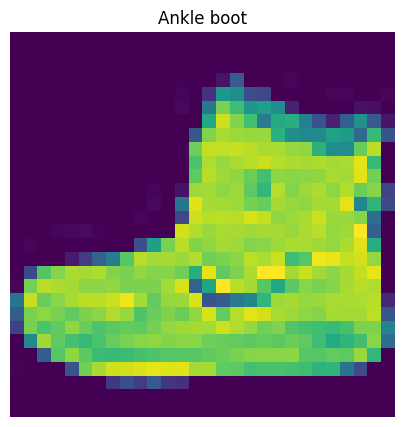

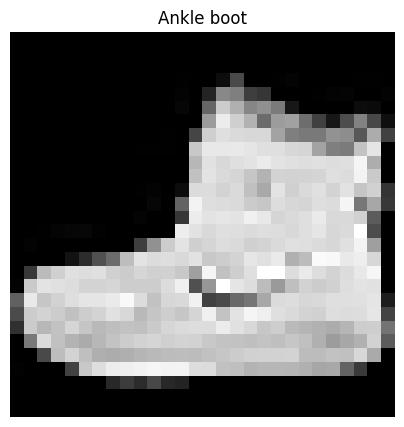

In [ ]:
image, label = train_data[0]
print(f'Image shape: {image.shape} -> [color_channels,height, Width]')
print(f'Label: {label} -> {class_names[label]}')
plt.figure(figsize=(5,5))
plt.imshow(image.squeeze())#Squeeze converts [1,28,28] -> [28,28]
plt.title(class_names[label])
plt.axis(False)
plt.figure(figsize=(5,5))
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

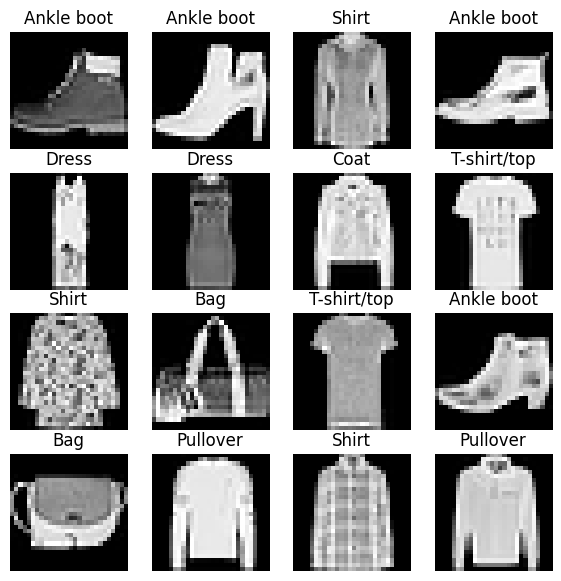

In [ ]:
#PLot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(7,7))
rows,cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data), size=[1]).item()
    img,label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(),cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

## 2.- Prepare Dataloader
The data is on the form of PyTorch Datasets.

DataLoader, turns our dataset into a PyTorch iterable.

More specifically, we want to turn our data into **batches = Lotes** (or mini-batches).

Why would we do this?

1. It's more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 6000 images in one hit. So we brek it down to 32 images at a time (batch size of 32).
2. It give our nn more chance to update its gradient per epoch.


In [ ]:
from torch.utils.data import DataLoader

#Setup the batch size hyperparameter
BATCH_SIZE = 32

#Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True
                              )
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False
                             )
train_dataloader,test_dataloader #Are instances

(<torch.utils.data.dataloader.DataLoader at 0x7837b365de90>,
 <torch.utils.data.dataloader.DataLoader at 0x7837b1459050>)

In [ ]:
#Check out what we've created
print(f'Train Dataloader: {train_dataloader}\nLength of the train_dataloader: {len(train_dataloader)}\nType: {type(train_dataloader)}')

print(f'Test Dataloader: {test_dataloader}\nLength of the test_dataloader: {len(test_dataloader)}\n')



Train Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7837b365de90>
Length of the train_dataloader: 1875
Type: <class 'torch.utils.data.dataloader.DataLoader'>
Test Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7837b1459050>
Length of the test_dataloader: 313



In [ ]:
print(f'Length of train_dataloader:{len(train_dataloader)} Batches of {BATCH_SIZE}')
print(f'Length of test_dataloader:{len(test_dataloader)} batches of {BATCH_SIZE}')

Length of train_dataloader:1875 Batches of 32
Length of test_dataloader:313 batches of 32


In [ ]:
#Check out what's inside the trainig dataloader
train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 3, label size: torch.Size([])


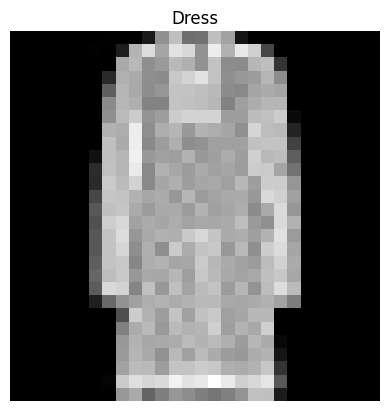

In [ ]:
#Show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False);
print(f'Image size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

## 3.- Model 0. BUilding a basline model.

When starting to build a series of machine learning modeling experiments, it's best preactice to start witha baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: Start simply and add complexity when necessary.

In [ ]:
#Create a flatten layer.
flatten_model = nn.Flatten()

# Get a simple sample
x = train_features_batch[0]
print(f'Shape of x before flattening: {x.shape}')
print(f'Shape of x after flattening: {flatten_model(x).shape}')

#Flatten the sample
output = flatten_model(x)
output.shape

Shape of x before flattening: torch.Size([1, 28, 28])
Shape of x after flattening: torch.Size([1, 784])


torch.Size([1, 784])

In [ ]:
from torch import nn
class FahionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

#Setup model with input parameters
model_0 = FahionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10, #How many units in the hidden layer
    output_shape=len(class_names)).to('cpu') #One for every class
model_0

FahionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_X = torch.rand([1,1,1,28,28])
model_0(dummy_X)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Setup loss, optimizer and evaluatin metrics.

* Loss function -  since we're working with multi-class data, our loss function will be `nn.CrossENtropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (Stochastic Gradient Descent)
* Evaluatin metric - since we're working on a classification     

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary #If cannot import function -> Try restart session (Ctrl+M), that could help

In [ ]:
#IMport accuracy metric
from helper_functions import accuracy_fn

#Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


### 3.2 Creating a function to time our expeiments

ML is very esperimental

Two of the main thing you'll often want to track are:
1. Model's performance (loss and accuracy values, etc.)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer

def print_train_time(start:   float,
                     end:     float,
                     device:  torch.device =None):
  ''' Print differences between start and end time. '''
  total_time = end-start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time

In [ ]:
start_time = timer()
#Some code
end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device=None)

Train time on None: 0.000 seconds


4.4493000018519524e-05

### 3.3.- Creating a training loop and trainnig
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculates the train loss **per batch**
3. Loop through testin batches, perform testing steps, calculate the test loss **per batch**.
4. Print out what's happening.
5. Time it all.

In [ ]:
#Import tqdm for progress bar
from tqdm.auto import tqdm

#Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

#Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

#Create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f'\nEpoch: {epoch}\n\n-------------------------------')
  ###Training
  train_loss = 0

  #Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader): #X := image, y:=layer
    model_0.train()
    #1.- Forward pass
    y_pred = model_0(X)

    #2.- Calculate the loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss #Accumulate the loss

    #3.- Optimizer zero grad
    optimizer.zero_grad()

    #4.- Loss backward
    loss.backward()

    #5.- Optimizer step
    optimizer.step()

    #Print out what's happening
    if batch % 400 == 0:
      print(f'Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples')


  # Divide total train loss by length of training dataloader
  train_loss /= len(train_dataloader)


  ### Testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      #1.-Forward pass
      test_pred = model_0(X)
      #2.-Calculate the loss (accumulatively)
      test_loss += loss_fn(test_pred,y)
      #3.- Calculate accuracy
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))


    #Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    #Calculate the test accuracy average per batch
    test_acc /= len(test_dataloader)
  # Print out what's happening
  print(f'Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%')

#Calculate the trining time
print_train_time_on_cpu = timer()
print('\n')
total_training_time = print_train_time(
    start=train_time_start_on_cpu,
    end=print_train_time_on_cpu,
    device=str(next(model_0.parameters()).device)
)






  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0

-------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.59039 | Test loss: 0.50954 | Test acc: 82.04%

Epoch: 1

-------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.47633 | Test loss: 0.47989 | Test acc: 83.20%

Epoch: 2

-------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.45503 | Test loss: 0.47664 | Test acc: 83.43%


Train time on cpu: 26.597 seconds


##Make prediction and get Model_0 resuts.

In [ ]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device):
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      #SEt device on the target device
      X,y = X.to(device),y.to(device)
      #Make predictions
      y_pred = model(X)

      #Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    #Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {'model_name': model.__class__.__name__,
          'model_loss': loss.item(),
          'model_acc': acc}


In [ ]:
#Calculate model_0 results on test dataset
"""
device = 'cuda' if torch.cuda.is_available() else 'cpu'
medlo_0_results = eval_model(model=model_0,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn,
                              device=device)

medlo_0_results
"""


"\ndevice = 'cuda' if torch.cuda.is_available() else 'cpu'\nmedlo_0_results = eval_model(model=model_0,\n                              data_loader=test_dataloader,\n                              loss_fn=loss_fn,\n                              accuracy_fn=accuracy_fn,\n                              device=device)\n\nmedlo_0_results\n"

## 5.- Setup device agnostic-code (for using aGPU if there is one)

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
torch.cuda.is_available()

False

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 6.- Model_1: BUilding a better model with non_Linearity



In [ ]:
#Create a model with non-linear and lineart layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU()
        )
  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
#Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)#Send to the GPU if it's avviable
next(model_1.parameters()).device

device(type='cpu')

### 6.1.- Setup loss, optimizer and evaluating metrics

In [ ]:
from helper_functions import accuracy_fn

#Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()#Measure how wrong a model is
optimizer = torch.optim.SGD(params=model_1.parameters(),#Update our model parameters to reduce loss
                            lr=0.1)

### 6.2.- Functionizing trainig and evaluatin/testing loop

Create a function for:
* Trainig loop - `train_step()`
* Testing loop - `test_step()`


In [ ]:
def train_step(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """ Performs a trining with model trying
      to learn on data_loader.  """

  train_loss, train_acc = 0,0

  model.train()

  #Add a loop to loop through the trainig batches
  for batch, (X,y) in enumerate(data_loader):
    # Put data on target device
    X,y = X.to(device), y.to(device)

    #1.- Forward pass
    y_pred = model(X)

    #2.- Calculate the loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss #Accumulate the loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) #Go from logits to prediction labels

    #3.- Optimizer zero grad
    optimizer.zero_grad()

    #4.- Loss backward
    loss.backward()

    #5.- Optimizer step
    optimizer.step()

  # Divide total train loss by length of training dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  #Print out what's happening
  if batch % 400 == 0:
    print(f'Train loss: {train_loss:.5f} | Train acc:{train_acc:.2f}%')

In [ ]:
def test_step(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0,0 #Dont put this here will create an error in the process <<with:>>

  #Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X,y in data_loader:
      #Send the data to target device
      X,y = X.to(device),y.to(device)

      #1.- Forward pass
      test_pred = model(X)

      #2,. Calculate the Loss/Acc
      test_loss += loss_fn(test_pred,y)
      test_acc  += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))
          #From logits -> Prediction labels

    #Adjust the metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f'Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n')


In [ ]:
torch.manual_seed(42)

#Measure time
from timeit import default_timer as timer

train_time_start_on_gpu = timer()

#Set epochs
epochs =3

from helper_functions import accuracy_fn

#Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

#Create a optimization and evaluatin loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f'\nEpoch: {epoch}\n---------')
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=train_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(
    start=train_time_start_on_gpu,
    end=train_time_end_on_gpu,
    device=str(next(model_1.parameters()).device)
)


  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
---------
Test loss: 0.92727 | Test acc: 66.00%


Epoch: 1
---------
Test loss: 0.68793 | Test acc: 75.43%


Epoch: 2
---------
Test loss: 0.64329 | Test acc: 76.87%

Train time on cpu: 41.689 seconds


In [ ]:
#Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6874349117279053,
 'model_acc': 75.65894568690096}

###6.3.- Model 2: Building a Convolutional Neuronal Network.

In [ ]:
# Create a convolutional nn
class ConvolutionalNN(nn.Module):

  """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
      super().__init__()
      self.block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3, # how big is the square that's going over the image?
                    stride=1, # default
                    padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,
                       stride=2) # default stride value is same as kernel_size
      )
      self.block_2 = nn.Sequential(
          nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
          nn.ReLU(),
          nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2)
      )
      self.classifier = nn.Sequential(
          #Here x goes at ([1, 10, 7, 7]), 10 are the hidden units
          nn.Flatten(),
          #So flattern gives an array of 10*7*7
          nn.Linear(in_features=hidden_units*7*7, #10*7*7
                    out_features=output_shape)
      )

  def forward(self, x: torch.Tensor):
      #print('Output in the beggining -> \n\t{}'.format(x.shape))
      x = self.block_1(x)
      #print('Output after block #1 -> \n\t{}'.format(x.shape))
      x = self.block_2(x)
      #print('Output after block #2 -> \n\t{}'.format(x.shape))
      x = self.classifier(x)
      #print('Output after block #3 -> \n\t{}'.format(x.shape))
      return x

In [ ]:
torch.manual_seed(42)
model_2 = ConvolutionalNN(input_shape   = 1,
                          hidden_units  = 10,
                          output_shape  = len(class_names) ).to(device)


In [ ]:
rand_image_tensor = torch.rand(size=image.shape)
rand_image_tensor.shape


torch.Size([1, 28, 28])

In [ ]:
#Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d`.

In [ ]:
torch.manual_seed(42)

#Create a batch of images
images = torch.rand(size=(5,3,64,64))
test_image = images[0]

print(f'Image batch shape -> {image.shape}')
print(f'Single image shape -> {test_image.shape}')
print(f'Test image ->\n{test_image}')

Image batch shape -> torch.Size([1, 28, 28])
Single image shape -> torch.Size([3, 64, 64])
Test image ->
tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 

In [ ]:
torch.manual_seed(42)
conv_layer = nn.Conv2d( #Single conv2d layer
    in_channels   = 3,
    out_channels  = 10,
    kernel_size   = (3,3),
    stride        = 1,
    padding       = 1
    )

#Pass the data through the convolutional layer

conv_output = conv_layer(test_image.unsqueeze(dim=0))#Add an extra dimension
print(f'Output shape -> {conv_output.shape}')
conv_output

Output shape -> torch.Size([1, 10, 64, 64])


tensor([[[[ 0.3723,  0.4130,  0.4932,  ...,  0.2233,  0.2555,  0.1500],
          [ 0.4561,  0.6552,  0.5381,  ...,  0.1734,  0.2343,  0.5169],
          [ 0.5605,  0.4011,  0.2772,  ...,  0.3547,  0.4406,  0.1736],
          ...,
          [ 0.4173,  0.4143,  0.6770,  ...,  0.3320,  0.5752,  0.2145],
          [ 0.4520,  0.1725,  0.3980,  ...,  0.5133,  0.3385,  0.4232],
          [ 0.4202,  0.4273,  0.4284,  ...,  0.2919,  0.4275,  0.1534]],

         [[-0.1190, -0.1214, -0.0371,  ...,  0.0978, -0.3614, -0.1220],
          [-0.5015,  0.0954, -0.0688,  ..., -0.4996, -0.0184,  0.2113],
          [-0.0653, -0.0188, -0.1703,  ..., -0.0339,  0.1632, -0.0642],
          ...,
          [ 0.0369, -0.1508, -0.1934,  ..., -0.0989,  0.2556, -0.2318],
          [ 0.1521,  0.0447,  0.1020,  ..., -0.0682, -0.2266, -0.2989],
          [-0.4602, -0.1780, -0.4226,  ..., -0.2864, -0.0762, -0.1898]],

         [[ 0.1305,  0.1485, -0.1376,  ..., -0.0726,  0.3210,  0.1206],
          [-0.0889,  0.0098,  

### 7.2.- Stepping through `nn.MaxPool2d()`.

In [ ]:
#Print out original image shape without unsqueezed dimension
print(f'Test image original shape -> {test_image.shape}')
print(f'Test image with unsqueezed dimension -> {test_image.unsqueeze(dim=0).shape}')

#Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#Passs data through just the conv:layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f'Shape after going through conv_layer() -> {test_image_through_conv.shape}')

#Pass data through the maxpool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f'Shape after going through conv_layer() and max_pool_layer() -> {test_image_through_conv_and_max_pool.shape}')

Test image original shape -> torch.Size([3, 64, 64])
Test image with unsqueezed dimension -> torch.Size([1, 3, 64, 64])
Shape after going through conv_layer() -> torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer() -> torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)
#Create a random tensor with a similar number  of dimensions to our images
random_tensor = torch.rand(size=(1,1,2,2))
print(f'\nRndom tensor:\n{random_tensor}')
print(f'RAndom tensor shape: {random_tensor.shape}')
#CReate a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#Pass the random tensor through the max_pool_layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMAx pool tensor:\n\t {max_pool_tensor}')
print(f'Max  pool tensor shape: {max_pool_tensor.shape}')
random_tensor


Rndom tensor:
tensor([[[[0.8823, 0.9150],
          [0.3829, 0.9593]]]])
RAndom tensor shape: torch.Size([1, 1, 2, 2])

MAx pool tensor:
	 tensor([[[[0.9593]]]])
Max  pool tensor shape: torch.Size([1, 1, 1, 1])


tensor([[[[0.8823, 0.9150],
          [0.3829, 0.9593]]]])

In [ ]:
test_image.shape,test_image.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

###7.3 Setup loss function and optimizer for model_2

In [ ]:
#Create loss function/eval metrics/optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [ ]:
model_2.state_dict

<bound method Module.state_dict of ConvolutionalNN(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)>

###7.4 Training and testing model_2 using our training and test functions.


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

#Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'\nEpoch: {epoch}\n---------')
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=train_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(
    start=train_time_start_model_2,
    end=train_time_end_model_2,
    device=str(next(model_2.parameters()).device)
)


  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
---------
Test loss: 0.37069 | Test acc: 86.78%


Epoch: 1
---------
Test loss: 0.36101 | Test acc: 87.55%


Epoch: 2
---------
Test loss: 0.31951 | Test acc: 88.65%

Train time on cpu: 180.475 seconds


In [ ]:
#Get model_2 results
model_2_results = eval_model(
      model=model_2,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
    )
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'ConvolutionalNN',
 'model_loss': 0.34938228130340576,
 'model_acc': 87.46006389776358}

In [ ]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6874349117279053,
 'model_acc': 75.65894568690096}

## 8.- Compare the results ans training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame(data=[model_1_results,
                                      model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV1,0.687435,75.658946
1,ConvolutionalNN,0.349382,87.460064


In [ ]:
# Add training time to results comparation
compare_results["training_time"] = [total_train_time_model_1,
                                      total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV1,0.687435,75.658946,41.68899
1,ConvolutionalNN,0.349382,87.460064,180.47463


Text(0, 0.5, 'Model')

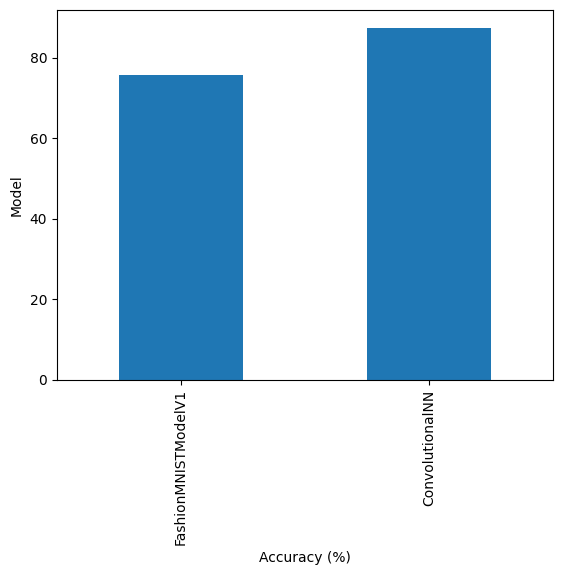

In [ ]:
#Visualize outr model results
compare_results.set_index("model_name")["model_acc"].plot(kind="bar")
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')

##.- Make and evaluate random predictions with best model.

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #Send the data to target device
      sample = torch.unsqueeze(sample,dim=0).to(device)

      #Forward pass (model output raw logits)
      pred_logit = model(sample)

      #Get prediction probability (logit -> prediction probabilities
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      #Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  #Stack the pred_prbobs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

#View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

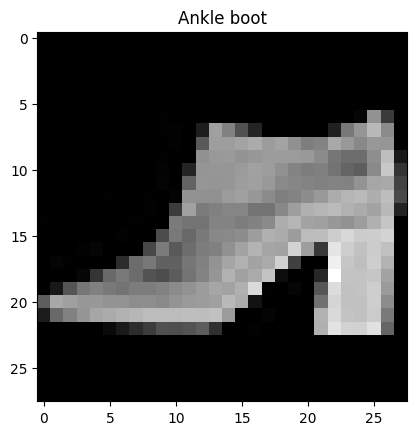

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]])

In [ ]:
#Make prediction
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
#View the first prediction prob
pred_probs[0]

tensor([1.8611e-07, 1.1412e-07, 2.3420e-07, 1.2235e-07, 8.2042e-08, 4.6636e-03,
        1.3691e-07, 2.6697e-04, 5.5745e-05, 9.9501e-01])

In [ ]:
#Convert prediction probabilities to labels
pred_classes = torch.argmax(pred_probs,dim=1)
pred_classes

tensor([9, 4, 6, 9, 7, 0, 4, 0, 5])

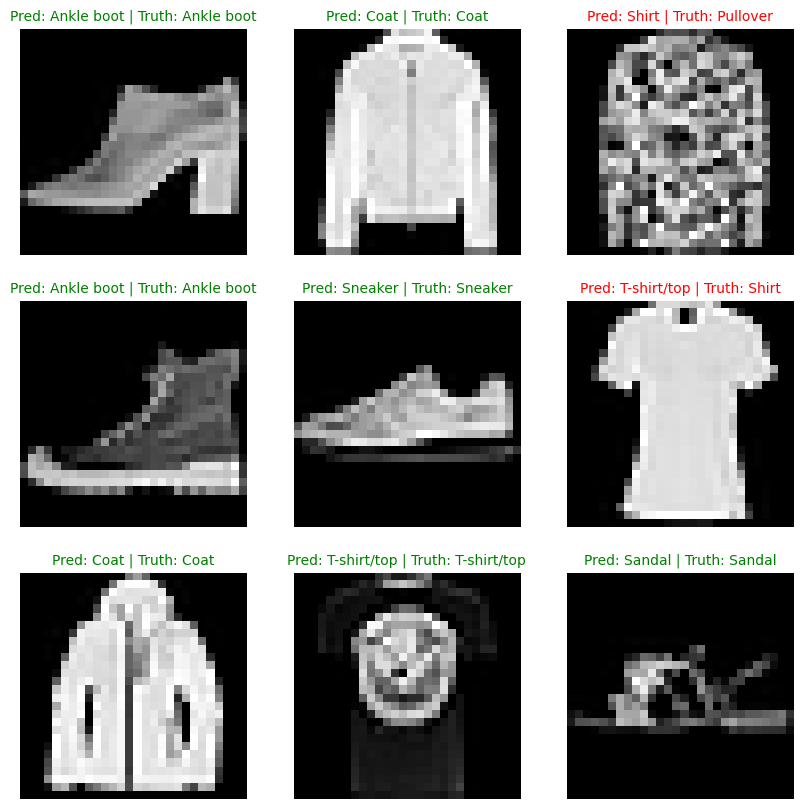

In [ ]:
#Plot predictions
plt.figure(figsize=(10,10))
nrows = 3
ncol = 3
for i, sample in  enumerate(test_samples):
  plt.subplot(nrows,ncol,i+1)
  plt.imshow(sample.squeeze(),cmap='gray')
  plt.imshow(sample.squeeze(),cmap='gray')

  color=""
  if class_names[pred_classes[i]] == class_names[test_labels[i]]:
    color = 'green'
  else:
    color='red'

  plt.title(f'Pred: {class_names[pred_classes[i]]} | Truth: {class_names[test_labels[i]]}', fontsize=10,c = color)
  plt.axis(False)

